In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import nltk
import sweetviz as sv

%matplotlib inline

In [2]:
df = pd.read_csv('../data/tweets&logreturns.csv')
df.head()

,source,text,cleaned_text,created_at,retweet_count,favorite_count,is_retweet,id_str,hashtag,mention,...,char_count,word_density,punctuation_freq,upper_case_freq,created_date,created_time,passed_closing,market_date,^GSPC,VGT
0,Twitter for iPhone,https://t.co/HUSFkHqsyC,NaN,2020-09-29 23:57:50,75761,321378,False,1311153253472636928,[],[],...,0,NaN,NaN,NaN,2020-09-29,23:57:50,1,2020-09-30,0.00822,0.007412
1,Twitter for iPhone,RT @TyCardon: Regardless who you’re pulling fo...,regardless youre pull think agree joe rogan wo...,2020-09-29 22:51:43,30926,0,True,1311136617327984640,[],[],...,139,4.964286,0.071429,0.071429,2020-09-29,22:51:43,1,2020-09-30,0.00822,0.007412
2,Twitter for iPhone,RT @realDonaldTrump: Rigged Election!,rig election,2020-09-29 22:37:44,66647,0,True,1311133095651717123,[],[],...,40,5.714286,0.428571,0.142857,2020-09-29,22:37:44,1,2020-09-30,0.00822,0.007412
3,Twitter for iPhone,https://t.co/58ssX7EfUj,NaN,2020-09-29 22:35:11,20658,65014,False,1311132452853706752,[],[],...,0,NaN,NaN,NaN,2020-09-29,22:35:11,1,2020-09-30,0.00822,0.007412
4,Twitter for iPhone,Volunteer to be a Trump Election Poll Watcher....,volunteer trump election poll watcher sign tod...,2020-09-29 22:30:39,14609,48540,False,1311131311965306885,['#MakeAmericaGreatAgain'],[],...,87,5.800000,0.200000,0.000000,2020-09-29,22:30:39,1,2020-09-30,0.00822,0.007412


### Sweetviz report

In [11]:
# generates a html report saved to '../data/EDA_Sweetviz_report.html'
my_report = sv.analyze(df)
my_report.show_html(filepath='../data/EDA_Sweetviz_report.html', open_browser=True)


Report ../data/EDA_Sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Time series plots

In [3]:
# join created_date and created_time
df['created_datetime'] = df['created_date'] + ' ' + df['created_time']
df['created_datetime'] = pd.to_datetime(df['created_datetime'])

# create a dummy column called count and fill the column with 1 for the frequency counts to work
df['count'] = 1

df.head()

,source,text,cleaned_text,created_at,retweet_count,favorite_count,is_retweet,id_str,hashtag,mention,...,punctuation_freq,upper_case_freq,created_date,created_time,passed_closing,market_date,^GSPC,VGT,created_datetime,count
0,Twitter for iPhone,https://t.co/HUSFkHqsyC,NaN,2020-09-29 23:57:50,75761,321378,False,1311153253472636928,[],[],...,NaN,NaN,2020-09-29,23:57:50,1,2020-09-30,0.00822,0.007412,2020-09-29 23:57:50,1
1,Twitter for iPhone,RT @TyCardon: Regardless who you’re pulling fo...,regardless youre pull think agree joe rogan wo...,2020-09-29 22:51:43,30926,0,True,1311136617327984640,[],[],...,0.071429,0.071429,2020-09-29,22:51:43,1,2020-09-30,0.00822,0.007412,2020-09-29 22:51:43,1
2,Twitter for iPhone,RT @realDonaldTrump: Rigged Election!,rig election,2020-09-29 22:37:44,66647,0,True,1311133095651717123,[],[],...,0.428571,0.142857,2020-09-29,22:37:44,1,2020-09-30,0.00822,0.007412,2020-09-29 22:37:44,1
3,Twitter for iPhone,https://t.co/58ssX7EfUj,NaN,2020-09-29 22:35:11,20658,65014,False,1311132452853706752,[],[],...,NaN,NaN,2020-09-29,22:35:11,1,2020-09-30,0.00822,0.007412,2020-09-29 22:35:11,1
4,Twitter for iPhone,Volunteer to be a Trump Election Poll Watcher....,volunteer trump election poll watcher sign tod...,2020-09-29 22:30:39,14609,48540,False,1311131311965306885,['#MakeAmericaGreatAgain'],[],...,0.200000,0.000000,2020-09-29,22:30:39,1,2020-09-30,0.00822,0.007412,2020-09-29 22:30:39,1


In [40]:
hourly_freq = df.groupby(df['created_datetime'].dt.hour)['count'].sum().fillna(0).reset_index(name ='count')
daily_freq = df.groupby(pd.Grouper(key='created_datetime', freq='D'))['count'].sum().fillna(0).reset_index(name ='count')
weekly_freq = df.groupby(df['created_datetime'].dt.weekday)['count'].sum().fillna(0).reset_index(name ='count')
monthly_freq = df.groupby(df['created_datetime'].dt.month)['count'].sum().fillna(0).reset_index(name ='count')
yearly_freq = df.groupby(df['created_datetime'].dt.year)['count'].sum().fillna(0).reset_index(name ='count')

In [50]:
plots = [hourly_freq, daily_freq, weekly_freq, monthly_freq, yearly_freq]
titles = ['Hourly Tweets Frequency', 'Daily Tweets Frequency', 'Weekly Tweets Frequency', 'Monthly Tweets Frequency', 'Yearly Tweets Frequency']
x_labels = ['hour', 'day', 'day of the week', 'month', 'year']

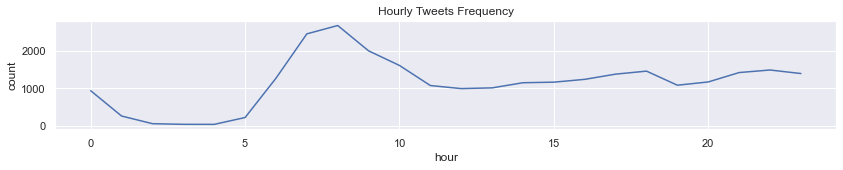

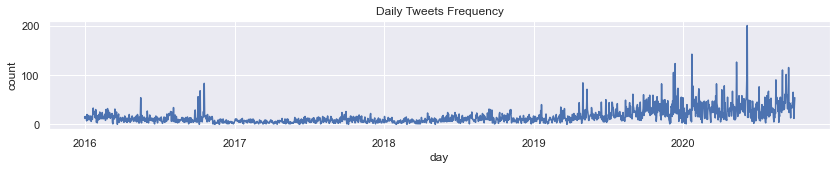

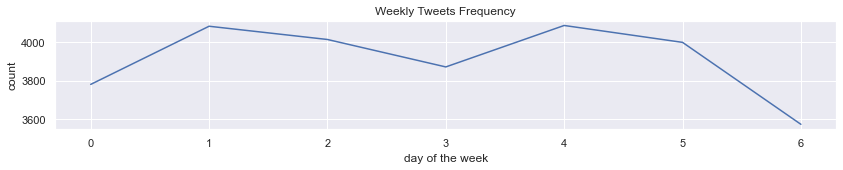

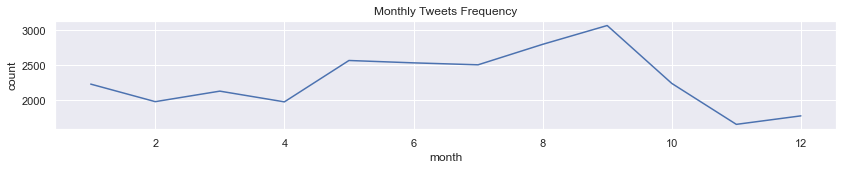

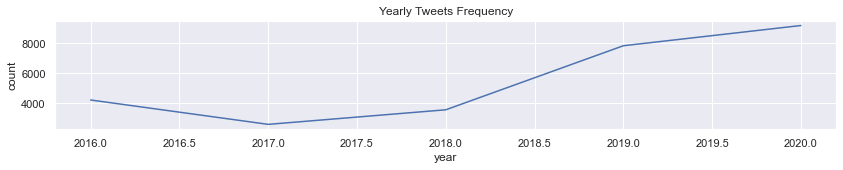

In [53]:
sns.set(rc={'figure.figsize':(14, 2)})
for i in range(len(plots)):
    ax = sns.lineplot(x='created_datetime', y='count', data=plots[i])
    ax.set_title(titles[i])
    ax.set_xlabel(x_labels[i])
    plt.show()

In [ ]:
# set datetime index
# df = df.set_index('created_datetime')